Dataset Regresión Logística – Heart Disease Cleveland UCI

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
14. condition: 0 = no disease, 1 = disease

Cuestion: ¿Depending if woman or men older than 50 years old, when exercising it induces angina?

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

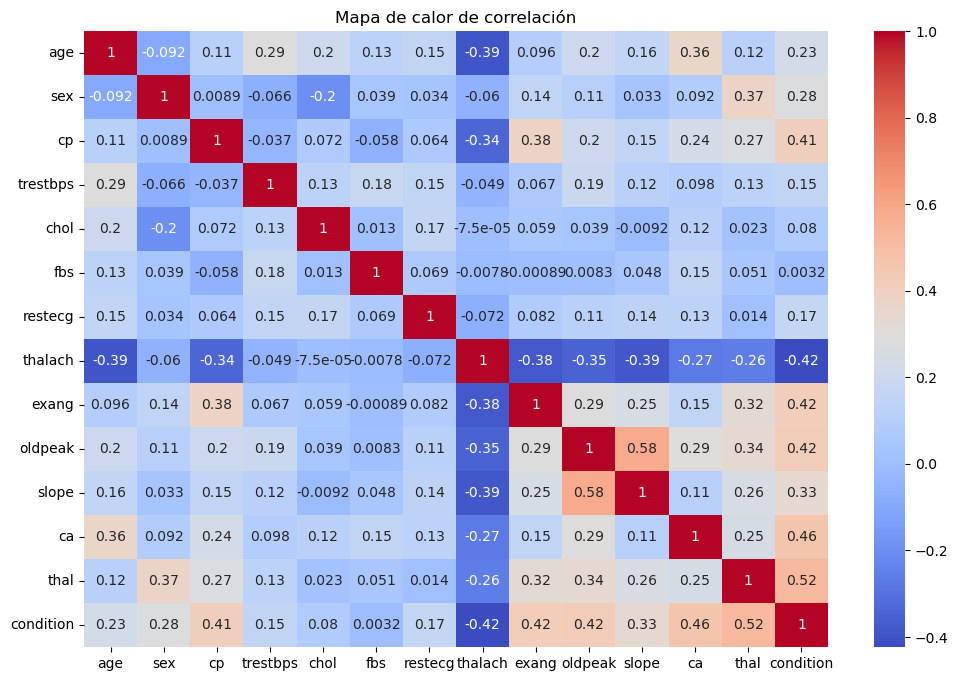

In [1]:
# ================================================
# PASO 1: Análisis Exploratorio de Datos (EDA)
# ================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv('heart_cleveland_upload.csv')

# Vista previa de los datos
display(df.head())
display(df.describe())
display(df.isnull().sum())

# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlación")
plt.show()

In [2]:
# ================================================
# PASO 2: Preprocesamiento de los Datos
# ================================================
from sklearn.preprocessing import StandardScaler

X = df.drop('condition', axis=1)
y = df['condition']

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [3]:
# ================================================
# PASO 3: Selección de Características
# ================================================
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X_scaled_df, y)
selected_features = X_scaled_df.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_features))

Características seleccionadas: ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [4]:
# ================================================
# PASO 4: Dividir Dataset en Entrenamiento y Prueba
# ================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df[selected_features], y, test_size=0.3, random_state=42)

In [5]:
# ================================================
# PASO 5: Entrenar el Modelo de Regresión Logística
# ================================================
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        48
           1       0.85      0.79      0.81        42

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



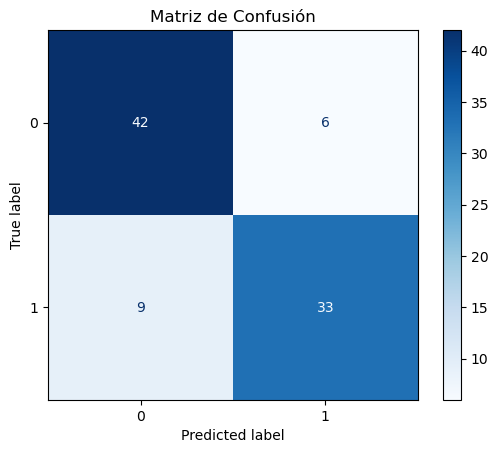

In [6]:
# ================================================
# PASO 6: Evaluar el Desempeño del Modelo
# ================================================
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

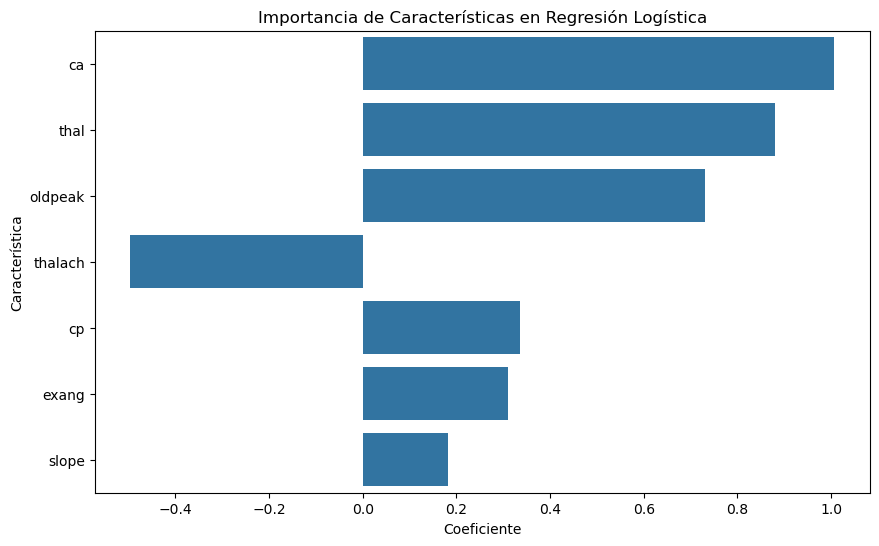

In [7]:
# ================================================
# PASO 7: Visualización de Resultados
# ================================================
# Coeficientes del modelo
coef_df = pd.DataFrame({
    "Característica": selected_features,
    "Coeficiente": model.coef_[0]
}).sort_values(by="Coeficiente", key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coeficiente', y='Característica')
plt.title("Importancia de Características en Regresión Logística")
plt.show()

In [8]:
# ================================================
# PASO 8: Interpretación y Documentación
# ================================================
print("Interpretación:")
print("""
Las variables más influyentes para predecir una enfermedad cardíaca fueron seleccionadas con base en su relevancia estadística.
El modelo alcanzó una buena precisión y balance entre recall y F1-score, lo cual indica un desempeño razonable.
Revisar los coeficientes puede ayudar a interpretar el impacto de cada variable en el diagnóstico.
""")

Interpretación:

Las variables más influyentes para predecir una enfermedad cardíaca fueron seleccionadas con base en su relevancia estadística.
El modelo alcanzó una buena precisión y balance entre recall y F1-score, lo cual indica un desempeño razonable.
Revisar los coeficientes puede ayudar a interpretar el impacto de cada variable en el diagnóstico.

